In [1]:
import pandas as pd
import numpy as np

from scipy.optimize import differential_evolution

from openpyxl import load_workbook

wb = load_workbook('./Lab2_optimal.xlsx')

# Чтение данных со столбцов C209:D238 на листе "Анализ модели" 
df = pd.read_excel('Lab2.xlsm', sheet_name='Анализ модели', usecols='C:G', skiprows=range(1, 208), nrows=30)

res_data = pd.DataFrame()


print(df)

    Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6
0     3.629292    7.537339   10.330210        1069        59.4
1     1.722373    5.897855    2.225990         636        75.7
2     4.982116    8.530534    3.846767        2114        88.3
3     2.465621    9.682211    1.654622         987        80.4
4     3.588092    3.998810    3.932707        1213        67.8
5     6.419904    2.470016    4.358379        2370        74.2
6     3.570330    8.084750    3.706442        1545        85.3
7     3.452406    3.777429    8.080660         642        37.0
8     1.994842    8.723075    2.328043         777        85.1
9     2.235267    5.417737    3.099826         895        77.5
10    3.605487    4.430586    5.870052        1085        60.3
11    3.131779    9.526749   10.914335         942        60.3
12    2.909482    3.053407    7.384411         274        19.3
13    1.707358    8.873867    9.672903         260        31.1
14    4.318888    7.175604    8.689962        1511     

c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\reader\workbook.py:88: UserWarning: File contains an invalid specification for Module1. This will be removed
  warn(msg)


In [2]:
x1 = df['Unnamed: 2'].to_numpy()
x2 = df['Unnamed: 3'].to_numpy()
x3 = df['Unnamed: 4'].to_numpy()
y1 = df['Unnamed: 5'].to_numpy()
y2 = df['Unnamed: 6'].to_numpy()
x4 = x1 * x1
x5 = x1 * x2
x6 = x1 * x3
x7 = x2 * x2
x8 = x2 * x3
x9 = x3 * x3




In [3]:
xLinear = np.array([x1, x2, x3], dtype="float").T
xSqare = np.array([x1, x2, x3, x4, x5, x6, x7, x8, x9], dtype="float").T

In [4]:
import statsmodels.api as sm

model = sm.OLS(y1, sm.add_constant(xLinear))
results = model.fit()
print("Linear regression for first parameter Y")
print(results.summary())


Linear regression for first parameter Y
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     63.83
Date:                Sun, 24 Dec 2023   Prob (F-statistic):           4.02e-12
Time:                        21:55:11   Log-Likelihood:                -213.38
No. Observations:                  30   AIC:                             434.8
Df Residuals:                      26   BIC:                             440.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [5]:
print(results.rsquared)

0.880457157404635


In [6]:
model = sm.OLS(y1, sm.add_constant(xSqare))
results = model.fit()
print("Linear regression for first parameter Y")
print(results.summary())
res_data['y1'] = pd.DataFrame(results.params) 

Linear regression for first parameter Y
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     63.80
Date:                Sun, 24 Dec 2023   Prob (F-statistic):           9.16e-13
Time:                        21:55:11   Log-Likelihood:                -194.37
No. Observations:                  30   AIC:                             408.7
Df Residuals:                      20   BIC:                             422.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [7]:
print(results.rsquared)

0.96633975375161


In [8]:
model = sm.OLS(y2, sm.add_constant(xLinear))
results = model.fit()
print("Linear regression for first parameter Y")
print(results.summary())

Linear regression for first parameter Y
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     56.92
Date:                Sun, 24 Dec 2023   Prob (F-statistic):           1.47e-11
Time:                        21:55:11   Log-Likelihood:                -114.39
No. Observations:                  30   AIC:                             236.8
Df Residuals:                      26   BIC:                             242.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [9]:
print(results.rsquared)

0.8678500439969641


In [10]:
model = sm.OLS(y2, sm.add_constant(xSqare))
results = model.fit()
print("Linear regression for first parameter Y")
print(results.summary())
res_data['y2'] = pd.DataFrame(results.params) 

Linear regression for first parameter Y
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     36.67
Date:                Sun, 24 Dec 2023   Prob (F-statistic):           1.68e-10
Time:                        21:55:11   Log-Likelihood:                -101.81
No. Observations:                  30   AIC:                             223.6
Df Residuals:                      20   BIC:                             237.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [11]:
print(results.rsquared)

0.9428679960467623


In [12]:
sheet_name = 'list1'
ws = wb[sheet_name]

start_row = ws.max_row + 1  


for index, row in res_data.iterrows():
    ws.cell(row=start_row + index, column=1, value=row['y1'])
    ws.cell(row=start_row + index, column=2, value=row['y2'])


wb.save('./Lab2_optimal.xlsx')

In [26]:
optimal = pd.read_excel('Lab2_optimal.xlsx', sheet_name='list1', usecols='H', skiprows=range(1, 4), nrows=2)
optimal.iloc[1]

1    23.435228
Name: 1, dtype: float64

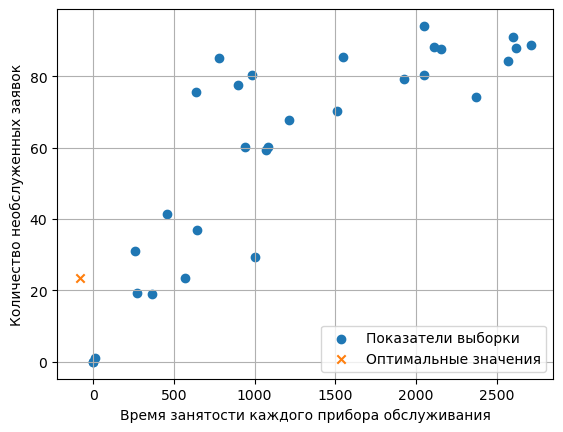

In [28]:
import matplotlib.pyplot as plt

plt.scatter(y1, y2, label='Показатели выборки')
plt.scatter(optimal.iloc[0], optimal.iloc[1], marker='x', label='Оптимальные значения')
plt.xlabel('Время занятости каждого прибора обслуживания')
plt.ylabel('Количество необслуженных заявок')
plt.legend()
plt.grid()
plt.show()